# Wrangle and clean data from scrapings

## Load libraries needed for wrangling and data clean

In [1]:
# displayed in groups as per some programmers files I have gleaned over the past 7 weeks.  Makes it easy to check when things go wrong (and they do!!)

# Project wide
import numpy as np
import pandas as pd
import glob
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # filter out non critical warnings - https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information
import nltk

# NLP
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # sentiment analysis
from rake_nltk import Rake # key word analysis
from nltk.stem import WordNetLemmatizer # lemmatization
from tensorflow.keras.preprocessing.text import Tokenizer # tokenizing text

# Visuals
import matplotlib.pyplot as plt # import pyplot for graphs
import plotly.graph_objects as go # import for violin plot grpahs

import seaborn as sns # for better quality graphs such as violin graphs (better presentation of details)
from wordcloud import WordCloud # import wordcloud to visualize words key words

# Machine Learning
from tensorflow.keras.preprocessing.sequence import pad_sequences # create 
from sklearn.model_selection import train_test_split # training model splitter
import tensorflow as tf # tensor flow used for modelling 
import tensorflow.keras.layers as L # create the layers to the RNN
from tensorflow.keras.losses import SparseCategoricalCrossentropy # determines models measure of analysis
from sklearn.metrics import accuracy_score # used for measuring models perfromance
from sklearn.metrics import mean_squared_error # used for measuring models perfromance
from sklearn.metrics import confusion_matrix # used for measuring models perfromance
from sklearn.metrics import classification_report # used for measuring models perfromance


In [2]:
# project directories

# reviews directory
dir_namer = r'c:\\users\\user\\Documents\\JCU\MA5851 Data Science Master Class 1\\220824\\reviews'

# file inputs and outputs directory
dir_namef = r'c:\\users\\user\\Documents\\JCU\MA5851 Data Science Master Class 1\\220824\\files'

In [3]:
# check reviews directory for listing of Hotel reviews
all_files = glob.glob(dir_namer+"/*.csv")

# display files
all_files

['c:\\\\users\\\\user\\\\Documents\\\\JCU\\MA5851 Data Science Master Class 1\\\\220824\\\\reviews\\bailey.csv',
 'c:\\\\users\\\\user\\\\Documents\\\\JCU\\MA5851 Data Science Master Class 1\\\\220824\\\\reviews\\benson.csv',
 'c:\\\\users\\\\user\\\\Documents\\\\JCU\\MA5851 Data Science Master Class 1\\\\220824\\\\reviews\\doubletree.csv',
 'c:\\\\users\\\\user\\\\Documents\\\\JCU\\MA5851 Data Science Master Class 1\\\\220824\\\\reviews\\flynn.csv',
 'c:\\\\users\\\\user\\\\Documents\\\\JCU\\MA5851 Data Science Master Class 1\\\\220824\\\\reviews\\hilton.csv',
 'c:\\\\users\\\\user\\\\Documents\\\\JCU\\MA5851 Data Science Master Class 1\\\\220824\\\\reviews\\mantraesp.csv',
 'c:\\\\users\\\\user\\\\Documents\\\\JCU\\MA5851 Data Science Master Class 1\\\\220824\\\\reviews\\mantratrilogy.csv',
 'c:\\\\users\\\\user\\\\Documents\\\\JCU\\MA5851 Data Science Master Class 1\\\\220824\\\\reviews\\novotel.csv',
 'c:\\\\users\\\\user\\\\Documents\\\\JCU\\MA5851 Data Science Master Class 1\\\\2

In [4]:
# clear arrays to receive input from review scrapings
df=[]
li=[]

for filename in all_files:
    
    df = pd.read_csv(filename,index_col=None,header=0)
    li.append(df)
    
li

[     Unnamed: 0  rating                                              title  \
 0             0      30                                    Looks Different   
 1             1      50                              Best hotel stay ever!   
 2             2      20         Disappointing Stay & Response to Situation   
 3             3      20                               Mould in the aircon?   
 4             4      40                        Clean and fresh hotel rooms   
 ..          ...     ...                                                ...   
 165         165      50                                     A shining star   
 166         166      50                                          Faultless   
 167         167      40  Overall a nice stay, with some teething problems.   
 168         168      50                                 Cairns' Newest Gem   
 169         169      50                                  Five Star Service   
 
                                                 r

In [5]:
# append all individual datafiles to one dataframe

df = pd.concat(li,axis=0,ignore_index=True)
df

,Unnamed: 0,rating,title,review,reviewer,reviewerdetails,staydate,hotel
0,0,30,Looks Different,Check In was seamless and Matthew handled all ...,iggyAustralia wrote a review 11 Aug,"Sydney, Australia127 contributions48 helpful v...",Date of stay: August 2022,cb
1,1,50,Best hotel stay ever!,This hotel was everything we expected and more...,Letch_K wrote a review June 2021,"Brisbane, Australia29 contributions7 helpful v...",Date of stay: May 2021,cb
2,2,20,Disappointing Stay & Response to Situation,We booked a 2 night stay in a residence for 7 ...,Rob P wrote a review 2 Aug,"Colchester, United Kingdom8 contributions4 hel...",Date of stay: August 2022,cb
3,3,20,Mould in the aircon?,I stayed here for a business trip and the room...,Courtney J wrote a review July 2022,2 contributions,Date of stay: June 2022,cb
4,4,40,Clean and fresh hotel rooms,Stayed here for a work conference. The room wa...,RubyRou wrote a review July 2022,"Mt Eliza, Australia64 contributions50 helpful ...",Date of stay: July 2022,cb
...,...,...,...,...,...,...,...,...
20912,3016,50,Shangri-La a Definite must!,Stayed at Shangri-La for a week during our hon...,Venture17314 wrote a review Aug 2005,"Newtownards, Northern Ireland1 contribution1 h...",Date of stay: August 2005,sl
20913,3017,50,"Shagri La, a little slice of paridise",This hotel has a great location and the recent...,shap2 wrote a review May 2005,"Novi, Michigan27 contributions40 helpful votes",Date of stay: August 2005,sl
20914,3018,30,"nice, but not perfect","the Shangri-la, formerly the Radisson is in a ...",koala wrote a review Apr 2005,the netherlands17 contributions88 helpful votes,Date of stay: April 2005,sl
20915,3019,50,Shangri-La....Take me away!,Spent March 20th at the Shangri-La Cairns this...,NYCshopper wrote a review Mar 2005,New York City302 contributions490 helpful votes,Date of stay: March 2005,sl


## Commence wrangling - setup new data columns for date reviewed, contributions and votes

In [6]:
# copy date review column to split out name of reviewer
# result will be a date reviewed and reviewer
df['date_review'] = df['reviewer']

# copy reviewer details to new column = contributions
df['contributions'] = df['reviewerdetails']

# copy Contributions to votes
df['votes'] = df['contributions']

Use regex to clear out superflous data from staydate, date reviewed, reviewer, reviewer details, contributions and votes fields.

In [7]:
# return rating as a 1-5 rating
df['rating'] = df['rating'].div(10).round(0)


# clean out everything except for date in date reviewed
df['staydate'] = df['staydate'].str.replace('Date of stay:','', regex=True)
df['staydate'] = df['staydate'].str.replace('^.','', regex=True)

# clean out everything in date review except date
df['date_review'] = df['date_review'].str.replace(r'.*review.','', regex=True)


# clean reviewer of surfluous characters
df['reviewer'] = df['reviewer'].str.replace(r'.wrote.*','', regex=True)
df['reviewer'] = df['reviewer'].str.strip()
df['reviewer'] = df['reviewer'].fillna('unknown')

# retain ony vote numbers
df['votes'] = df['votes'].str.replace(r'.*contributions','', regex=True)
df['votes'] = df['votes'].str.replace(r'.*contribution','', regex=True) # single row items without cirty details
df['votes'] = df['votes'].str.replace(r'(\D+)','', regex=True)
df['votes'] = df['votes'].str.strip()


# strip string portion of contributions to the right of contribution
df['contributions'] = df['contributions'].str.replace(r'contrib.*','', regex=True)


# copy above result to reviwer details (reviewer details has suffix of numerics, contributions has legacy characters)
df['reviewerdetails'] = df['contributions']


# remove numercis from review details
df['reviewerdetails'] = df['reviewerdetails'].str.replace(r'(\d+)','', regex=True)
df['reviewerdetails'] = df['reviewerdetails'].str.strip()


# remove characters from contributions
df['contributions'] = df['contributions'].str.replace(r'(\D+)','', regex=True)
df['contributions'] = df['contributions'].str.strip()
df.drop('Unnamed: 0', axis = 1, inplace = True)


Send cleaned and wrangled data to file

In [8]:
# name of wrangled file
wd = r'wrangleddata.csv'

# default path for file
path_to_file = os.path.join(dir_namef, wd)

# write df to csv
df.to_csv(path_to_file, index=False)

# this step was includued as whitespace was not disappearing when normalised (could not overcome programically after hours of trying)

## Normalise data

In [9]:
# import wrangled review data
df = pd.read_csv(os.path.join(dir_namef, wd))

In [10]:
### remove null values from reviewerdetails, contributors and votes 
df['reviewerdetails'] = df['reviewerdetails'].fillna("unknown")
df['date_review'] = df['date_review'].fillna(df['staydate'])
df['contributions'] = df['contributions'].fillna(0)
df['votes'] = df['votes'].fillna(0)
df

,rating,title,review,reviewer,reviewerdetails,staydate,hotel,date_review,contributions,votes
0,3.0,Looks Different,Check In was seamless and Matthew handled all ...,iggyAustralia,"Sydney, Australia",August 2022,cb,11 Aug,127.0,48.0
1,5.0,Best hotel stay ever!,This hotel was everything we expected and more...,Letch_K,"Brisbane, Australia",May 2021,cb,June 2021,29.0,7.0
2,2.0,Disappointing Stay & Response to Situation,We booked a 2 night stay in a residence for 7 ...,Rob P,"Colchester, United Kingdom",August 2022,cb,2 Aug,8.0,4.0
3,2.0,Mould in the aircon?,I stayed here for a business trip and the room...,Courtney J,unknown,June 2022,cb,July 2022,2.0,0.0
4,4.0,Clean and fresh hotel rooms,Stayed here for a work conference. The room wa...,RubyRou,"Mt Eliza, Australia",July 2022,cb,July 2022,64.0,50.0
...,...,...,...,...,...,...,...,...,...,...
20912,5.0,Shangri-La a Definite must!,Stayed at Shangri-La for a week during our hon...,Venture17314,"Newtownards, Northern Ireland",August 2005,sl,Aug 2005,1.0,1.0
20913,5.0,"Shagri La, a little slice of paridise",This hotel has a great location and the recent...,shap2,"Novi, Michigan",August 2005,sl,May 2005,27.0,40.0
20914,3.0,"nice, but not perfect","the Shangri-la, formerly the Radisson is in a ...",koala,the netherlands,April 2005,sl,Apr 2005,17.0,88.0
20915,5.0,Shangri-La....Take me away!,Spent March 20th at the Shangri-La Cairns this...,NYCshopper,New York City,March 2005,sl,Mar 2005,302.0,490.0


Review data for unique values and features

In [11]:
# data overview (extracted code from previous used code for ISBN project so know it is fit for purpose)

print('Matrix configuration Rows x Columns : ', df.shape[0], 'x', df.shape[1])
print('Features of recommender: ', df.columns.tolist())
print('\nUnique values of dataset:')
print(df.nunique())
for col in df.columns:
    print(col, end=': ')
    print(df[col].unique())

Matrix configuration Rows x Columns :  20917 x 10
Features of recommender:  ['rating', 'title', 'review', 'reviewer', 'reviewerdetails', 'staydate', 'hotel', 'date_review', 'contributions', 'votes']

Unique values of dataset:
rating                 5
title              15819
review             20912
reviewer           17932
reviewerdetails     4073
staydate             213
hotel                 14
date_review          250
contributions        931
votes                458
dtype: int64
rating: [3. 5. 2. 4. 1.]
title: ['Looks Different' 'Best hotel stay ever!'
 'Disappointing Stay & Response to Situation' ...
 'Shagri La, a little slice of paridise' 'nice, but not perfect'
 'Shangri-La....Take me away!']
review: ["Check In was seamless and Matthew handled all our questions about the hotel and Cairns in general with ease. This is an eco - friendly hotel so don't expect any plastic and paper he explained. The room key is a bamboo disk. Unfortunately our room was quite small and had an unple

### Review data to check for null-missing values

In [12]:
df.info()

print('\nMissing values in dataset:  ', df.isnull().sum().values.sum())

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20917 entries, 0 to 20916
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rating           20917 non-null  float64
 1   title            20917 non-null  object 
 2   review           20917 non-null  object 
 3   reviewer         20917 non-null  object 
 4   reviewerdetails  20917 non-null  object 
 5   staydate         20917 non-null  object 
 6   hotel            20917 non-null  object 
 7   date_review      20917 non-null  object 
 8   contributions    20917 non-null  float64
 9   votes            20917 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.6+ MB

Missing values in dataset:   0


rating             0
title              0
review             0
reviewer           0
reviewerdetails    0
staydate           0
hotel              0
date_review        0
contributions      0
votes              0
dtype: int64

### Create a concatenated column of title and review details to be used to source keywords

In [13]:
# Moving along the lines of bag of words output
df["reviews"] = df["title"]+", "+df["review"]
df['reviews'] = df['reviews'].str.replace('[^\w\s]','', regex=True)
df['reviews'] = df['reviews'].str.lower() # lower case for presentation and conformity purposes (visuals) prior to analysis
df

,rating,title,review,reviewer,reviewerdetails,staydate,hotel,date_review,contributions,votes,reviews
0,3.0,Looks Different,Check In was seamless and Matthew handled all ...,iggyAustralia,"Sydney, Australia",August 2022,cb,11 Aug,127.0,48.0,looks different check in was seamless and matt...
1,5.0,Best hotel stay ever!,This hotel was everything we expected and more...,Letch_K,"Brisbane, Australia",May 2021,cb,June 2021,29.0,7.0,best hotel stay ever this hotel was everything...
2,2.0,Disappointing Stay & Response to Situation,We booked a 2 night stay in a residence for 7 ...,Rob P,"Colchester, United Kingdom",August 2022,cb,2 Aug,8.0,4.0,disappointing stay response to situation we b...
3,2.0,Mould in the aircon?,I stayed here for a business trip and the room...,Courtney J,unknown,June 2022,cb,July 2022,2.0,0.0,mould in the aircon i stayed here for a busine...
4,4.0,Clean and fresh hotel rooms,Stayed here for a work conference. The room wa...,RubyRou,"Mt Eliza, Australia",July 2022,cb,July 2022,64.0,50.0,clean and fresh hotel rooms stayed here for a ...
...,...,...,...,...,...,...,...,...,...,...,...
20912,5.0,Shangri-La a Definite must!,Stayed at Shangri-La for a week during our hon...,Venture17314,"Newtownards, Northern Ireland",August 2005,sl,Aug 2005,1.0,1.0,shangrila a definite must stayed at shangrila ...
20913,5.0,"Shagri La, a little slice of paridise",This hotel has a great location and the recent...,shap2,"Novi, Michigan",August 2005,sl,May 2005,27.0,40.0,shagri la a little slice of paridise this hote...
20914,3.0,"nice, but not perfect","the Shangri-la, formerly the Radisson is in a ...",koala,the netherlands,April 2005,sl,Apr 2005,17.0,88.0,nice but not perfect the shangrila formerly th...
20915,5.0,Shangri-La....Take me away!,Spent March 20th at the Shangri-La Cairns this...,NYCshopper,New York City,March 2005,sl,Mar 2005,302.0,490.0,shangrilatake me away spent march 20th at the ...


## Preprocessing

### Sentiment Analysis to obtain a feel for the dataset - determine the sentiment of words used in reviews

In [14]:
## Using vanderSentimentAnalyzer to determine sentiment of reviews
## Analyzer allocates a polarity score as per the sentiment of text 
## Details of SentimentIntenseAnalyzer found at https://github.com/nltk/nltk/blob/develop/nltk/sentiment/vader.py#L441
## Note - SentimentIntenseAnalyzer should be run prior to cleaning data as per notes and the follwoing blog
### https://predictivehacks.com/how-to-run-sentiment-analysis-in-python-using-vader/ 

analyzer = SentimentIntensityAnalyzer()

# Compound score
def compound_score(txt):
    return analyzer.polarity_scores(txt)["compound"]

## Sentiments
def sentiment(score):
    emotion = ""
    if score >= 0.5:
        emotion = "Positive"
    elif score <= -0.5:
        emotion = "Negative"
    else:
        emotion = "Neutral"
    return emotion


## Satisfaction
def satisfaction(score):
    satisfied = ""
    if score >= 0.85:
        satisfied = "Satisfied"
    elif score <= 0:
        satisfied = "Complaint"
    else:
        satisfied = "Inconclusive"
    return satisfied

Apply Sentiment score and add sentiment score and sentiment to review dataframe

In [15]:
## Applying Compound score
polarity_scores = df["reviews"].astype("str").apply(compound_score)
df["sentiment_score"] = polarity_scores

## Applying Sentiment
df["sentiment"] = df["sentiment_score"].apply(sentiment)

## Applying Sentiment
df["satisfaction"] = df["sentiment_score"].apply(satisfaction)

# display header of dataframe
df.head()

,rating,title,review,reviewer,reviewerdetails,staydate,hotel,date_review,contributions,votes,reviews,sentiment_score,sentiment,satisfaction
0,3.0,Looks Different,Check In was seamless and Matthew handled all ...,iggyAustralia,"Sydney, Australia",August 2022,cb,11 Aug,127.0,48.0,looks different check in was seamless and matt...,0.9387,Positive,Satisfied
1,5.0,Best hotel stay ever!,This hotel was everything we expected and more...,Letch_K,"Brisbane, Australia",May 2021,cb,June 2021,29.0,7.0,best hotel stay ever this hotel was everything...,0.9823,Positive,Satisfied
2,2.0,Disappointing Stay & Response to Situation,We booked a 2 night stay in a residence for 7 ...,Rob P,"Colchester, United Kingdom",August 2022,cb,2 Aug,8.0,4.0,disappointing stay response to situation we b...,-0.7261,Negative,Complaint
3,2.0,Mould in the aircon?,I stayed here for a business trip and the room...,Courtney J,unknown,June 2022,cb,July 2022,2.0,0.0,mould in the aircon i stayed here for a busine...,0.9118,Positive,Satisfied
4,4.0,Clean and fresh hotel rooms,Stayed here for a work conference. The room wa...,RubyRou,"Mt Eliza, Australia",July 2022,cb,July 2022,64.0,50.0,clean and fresh hotel rooms stayed here for a ...,0.8963,Positive,Satisfied


Display sentiment counts

In [16]:
df[['sentiment','satisfaction']].apply(pd.Series.value_counts)

,sentiment,satisfaction
Complaint,NaN,1930.0
Inconclusive,NaN,3027.0
Negative,1251.0,NaN
Neutral,1537.0,NaN
Positive,18129.0,NaN
Satisfied,NaN,15960.0


Results - sentiment is bias with 86.7% of reviews being positive, 7.3% being neutral and 6.0% being negative.  Shifting to satsifaction and the mix obviously shuffles (per adjusting score cutofffs for categories).  Satisfied customer are 76.3% of the mix while complaints (<=0) are 9.2%.

## Save preprocessed data to file

In [17]:
pp = "preprocesseddata.csv"
path_to_file = os.path.join(dir_namef, pp)
df.to_csv(path_to_file, index=False)

## Visualise sentiment and rating values per reviews

In [18]:
# import wrangled review data
df = pd.read_csv(os.path.join(dir_namef, pp)) # roll back position

Plot overall sentiment score and ratings individually and collectively

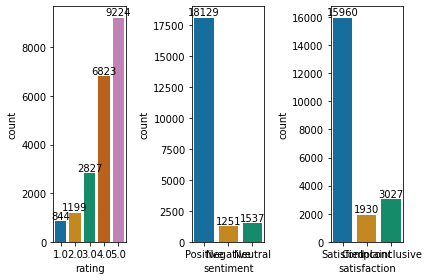

In [19]:
# Graph
plt.rcParams["figure.figsize"] = [15.00, 4.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1,3)

# set the width
Width =5.0

# graph 1 
ax1 =sns.countplot(data=df,x="rating",palette="colorblind", ax=axes[0])
ax1.bar_label(ax1.containers[0])

# graph 2 
ax2 =sns.countplot(data=df,x="sentiment",palette="colorblind", ax=axes[1])
ax2.bar_label(ax2.containers[0])

# graph 3
ax3 = sns.countplot(data=df,x="satisfaction",palette="colorblind", ax=axes[2])
ax3.bar_label(ax3.containers[0])

plt.show()

Review bubble rating bias with 44% of reviews being 5 bubbles, with only 4.0% being 1 bubble. Ratings 1-3 only provide 23.2% of overall reviews.   

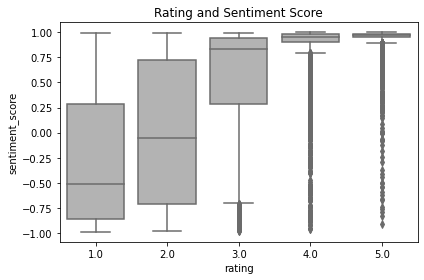

In [20]:
g1 = sns.boxplot(x="rating", y="sentiment_score", data=df, color="0.7")
g1.set(title='Rating and Sentiment Score')  # add a title
plt.show()

Rating 1 has an unsually long tail towards the unpper gate of 1 which indicates miss allocation either in the senitment score or the persons assignment of rating.

Rating 3 has outliers drifting form the lower gate at or around -0.75.

Rating 4 has outliers from 0.75 and rating 5 has a trail of outliers form its lower gate of 0.85.

It could prudent to trim these reviews form the mix to get a more precise profile for categorisation for our model


In [21]:
## Remove reviews as per above analysis:
## 1 = <0
## 2 = stays the same
## 3 = >-0.75
## 4 = > 0.75
## 5 = > 0.85


#df = df[~((df['rating'] == 1.0) & (df['sentiment_score'] >0))]
#df = df[~((df['rating'] == 3.0) & (df['sentiment_score'] <-0.75))]
#df = df[~((df['rating'] == 4.0) & (df['sentiment_score'] <0.75))]
#df = df[~((df['rating'] == 5.0) & (df['sentiment_score'] <0.85))]

In [22]:
#g1 = sns.boxplot(x="rating", y="sentiment_score", data=df, color="0.7")
#g1.set(title='Rating and Sentiment Score')  # add a title
#plt.show()

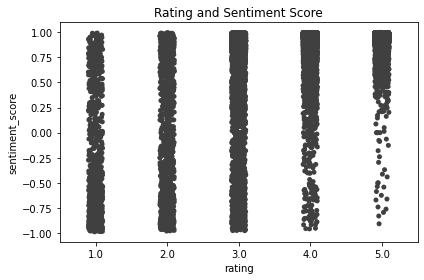

In [23]:
g1 = sns.stripplot(x="rating", y="sentiment_score", data=df, color=".25")
g1.set(title='Rating and Sentiment Score')  # add a title

plt.show()

In [24]:
df

,rating,title,review,reviewer,reviewerdetails,staydate,hotel,date_review,contributions,votes,reviews,sentiment_score,sentiment,satisfaction
0,3.0,Looks Different,Check In was seamless and Matthew handled all ...,iggyAustralia,"Sydney, Australia",August 2022,cb,11 Aug,127.0,48.0,looks different check in was seamless and matt...,0.9387,Positive,Satisfied
1,5.0,Best hotel stay ever!,This hotel was everything we expected and more...,Letch_K,"Brisbane, Australia",May 2021,cb,June 2021,29.0,7.0,best hotel stay ever this hotel was everything...,0.9823,Positive,Satisfied
2,2.0,Disappointing Stay & Response to Situation,We booked a 2 night stay in a residence for 7 ...,Rob P,"Colchester, United Kingdom",August 2022,cb,2 Aug,8.0,4.0,disappointing stay response to situation we b...,-0.7261,Negative,Complaint
3,2.0,Mould in the aircon?,I stayed here for a business trip and the room...,Courtney J,unknown,June 2022,cb,July 2022,2.0,0.0,mould in the aircon i stayed here for a busine...,0.9118,Positive,Satisfied
4,4.0,Clean and fresh hotel rooms,Stayed here for a work conference. The room wa...,RubyRou,"Mt Eliza, Australia",July 2022,cb,July 2022,64.0,50.0,clean and fresh hotel rooms stayed here for a ...,0.8963,Positive,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20912,5.0,Shangri-La a Definite must!,Stayed at Shangri-La for a week during our hon...,Venture17314,"Newtownards, Northern Ireland",August 2005,sl,Aug 2005,1.0,1.0,shangrila a definite must stayed at shangrila ...,0.9764,Positive,Satisfied
20913,5.0,"Shagri La, a little slice of paridise",This hotel has a great location and the recent...,shap2,"Novi, Michigan",August 2005,sl,May 2005,27.0,40.0,shagri la a little slice of paridise this hote...,0.9262,Positive,Satisfied
20914,3.0,"nice, but not perfect","the Shangri-la, formerly the Radisson is in a ...",koala,the netherlands,April 2005,sl,Apr 2005,17.0,88.0,nice but not perfect the shangrila formerly th...,0.3147,Neutral,Inconclusive
20915,5.0,Shangri-La....Take me away!,Spent March 20th at the Shangri-La Cairns this...,NYCshopper,New York City,March 2005,sl,Mar 2005,302.0,490.0,shangrilatake me away spent march 20th at the ...,0.8271,Positive,Inconclusive


### Review kewords driving sentiment

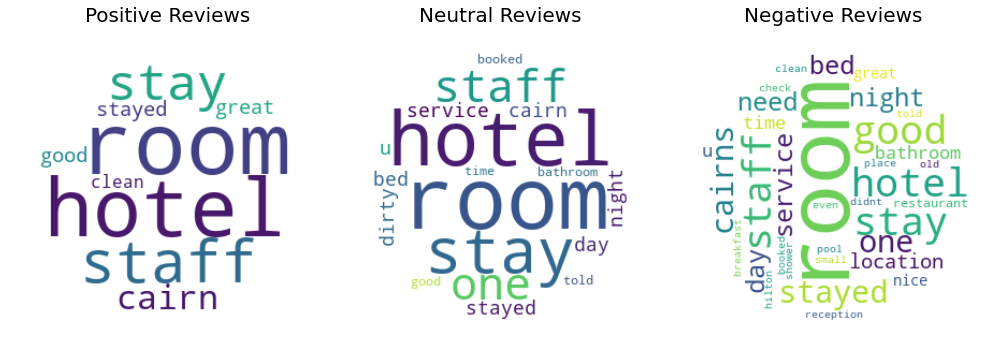

In [25]:
# Getting all the reviews termed positive in a single string and forming a word cloud of the string
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[14, 14], facecolor = None)

text1 =''
for i in df[df['sentiment']=='Positive']['reviews'].values:
    text1+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc1 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc1.generate(text1)

ax1.axis("off")
ax1.imshow(wc1, interpolation="bilinear")
ax1.set_title('Positive Reviews',fontsize=20);

text2 =''
for i in df[df['sentiment']=='Negative']['reviews'].values:
    text2+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc2 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc2.generate(text2)

ax2.axis("off")
ax2.imshow(wc2, interpolation="bilinear")
ax2.set_title('Neutral Reviews',fontsize=20);

text3 =''
for i in df[df['sentiment']=='Neutral']['reviews'].values:
    text3+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc3 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc3.generate(text3)

ax3.axis("off")
ax3.imshow(wc3, interpolation="bilinear")
ax3.set_title('Negative Reviews',fontsize=20);

plt.show()

### Highlight words that influence review ratings

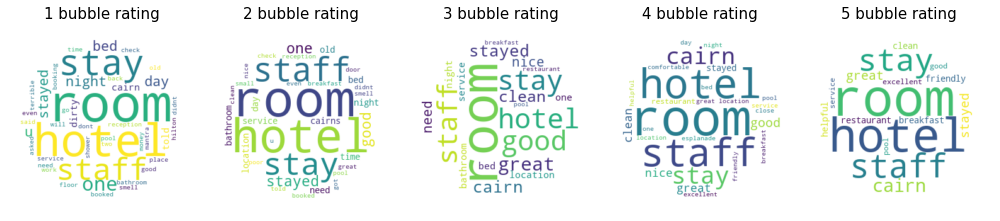

In [26]:
# Getting all the reviews termed positive in a single string and forming a word cloud of the string
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=[14, 14], facecolor = None)

text1 =''
for i in df[df['rating']==1]['reviews'].values:
    text1+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc1 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc1.generate(text1)

ax1.axis("off")
ax1.imshow(wc1, interpolation="bilinear")
ax1.set_title('1 bubble rating',fontsize=15);

text2 =''
for i in df[df['rating']==2]['reviews'].values:
    text2+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc2 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc2.generate(text2)

ax2.axis("off")
ax2.imshow(wc2, interpolation="bilinear")
ax2.set_title('2 bubble rating',fontsize=15);

text3 =''
for i in df[df['rating']==3]['reviews'].values:
    text3+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc3 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc3.generate(text3)

ax3.axis("off")
ax3.imshow(wc3, interpolation="bilinear")
ax3.set_title('3 bubble rating',fontsize=15);

text4 =''
for i in df[df['rating']==4]['reviews'].values:
    text4+=i + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc4 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc4.generate(text4)

ax4.axis("off")
ax4.imshow(wc4, interpolation="bilinear")
ax4.set_title('4 bubble rating',fontsize=15);

text5 =''
for i in df[df['rating']==5]['reviews'].values:
    text5+=i + ' '

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc5 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc5.generate(text5)

ax5.axis("off")
ax5.imshow(wc5, interpolation="bilinear")
ax5.set_title('5 bubble rating',fontsize=15);


plt.show()

## Loading Preprocessed Data to perform keyword analysis

In [27]:
# import wrangled review data
pp = "preprocesseddata.csv" # use only for roll back position during testing of script
df = pd.read_csv(os.path.join(dir_namef, pp))

In [28]:
# truncate dataframes and convert dataframes contents to string

reviewsDetails = df[['rating','title','review','hotel','sentiment','reviews']]
reviewsDetails=reviewsDetails.astype('str')

#reviewsDetails1 = pd.DataFrame(df, columns=['rating','title','review','hotel','sentiment',]) # to be used for training
#reviewsDetails1=reviewsDetails1.astype('str')

reviewsDetails

,rating,title,review,hotel,sentiment,reviews
0,3.0,Looks Different,Check In was seamless and Matthew handled all ...,cb,Positive,looks different check in was seamless and matt...
1,5.0,Best hotel stay ever!,This hotel was everything we expected and more...,cb,Positive,best hotel stay ever this hotel was everything...
2,2.0,Disappointing Stay & Response to Situation,We booked a 2 night stay in a residence for 7 ...,cb,Negative,disappointing stay response to situation we b...
3,2.0,Mould in the aircon?,I stayed here for a business trip and the room...,cb,Positive,mould in the aircon i stayed here for a busine...
4,4.0,Clean and fresh hotel rooms,Stayed here for a work conference. The room wa...,cb,Positive,clean and fresh hotel rooms stayed here for a ...
...,...,...,...,...,...,...
20912,5.0,Shangri-La a Definite must!,Stayed at Shangri-La for a week during our hon...,sl,Positive,shangrila a definite must stayed at shangrila ...
20913,5.0,"Shagri La, a little slice of paridise",This hotel has a great location and the recent...,sl,Positive,shagri la a little slice of paridise this hote...
20914,3.0,"nice, but not perfect","the Shangri-la, formerly the Radisson is in a ...",sl,Neutral,nice but not perfect the shangrila formerly th...
20915,5.0,Shangri-La....Take me away!,Spent March 20th at the Shangri-La Cairns this...,sl,Positive,shangrilatake me away spent march 20th at the ...


In [29]:
# Summary statitics of the book recommendation dataset
reviewsDetails.describe().T

,count,unique,top,freq
rating,20917,5,5.0,9224
title,20917,15819,Great location,338
review,20917,20912,#NAME?,4
hotel,20917,14,sl,3021
sentiment,20917,3,Positive,18129
reviews,20917,20916,nice rooms and views well located on the harbo...,2


Note: #Name? did not warrent further investigation as review and tile were joined thus resolving the prefixed '-' causing the error

### Define Keywords driving reviews

In [30]:
# to extract key words from reviews to a list

reviewsDetails['key_words'] = ''   
r = Rake()   # use Rake to discard stop words (based on english stopwords from NLTK)

for index, row in reviewsDetails.iterrows():
    r.extract_keywords_from_text(row['reviews'])   # to extract key words from reviews
    key_words_dict_scores = r.get_word_degrees()    # obtains dictionary with key words and their scores
    row['key_words'] = list(key_words_dict_scores.keys())   # to assign list of key words to new column

reviewsDetails

,rating,title,review,hotel,sentiment,reviews,key_words
0,3.0,Looks Different,Check In was seamless and Matthew handled all ...,cb,Positive,looks different check in was seamless and matt...,"[looks, different, check, seamless, matthew, h..."
1,5.0,Best hotel stay ever!,This hotel was everything we expected and more...,cb,Positive,best hotel stay ever this hotel was everything...,"[best, hotel, stay, ever, everything, expected..."
2,2.0,Disappointing Stay & Response to Situation,We booked a 2 night stay in a residence for 7 ...,cb,Negative,disappointing stay response to situation we b...,"[disappointing, stay, response, situation, boo..."
3,2.0,Mould in the aircon?,I stayed here for a business trip and the room...,cb,Positive,mould in the aircon i stayed here for a busine...,"[mould, aircon, stayed, business, trip, room, ..."
4,4.0,Clean and fresh hotel rooms,Stayed here for a work conference. The room wa...,cb,Positive,clean and fresh hotel rooms stayed here for a ...,"[clean, fresh, hotel, rooms, stayed, work, con..."
...,...,...,...,...,...,...,...
20912,5.0,Shangri-La a Definite must!,Stayed at Shangri-La for a week during our hon...,sl,Positive,shangrila a definite must stayed at shangrila ...,"[shangrila, definite, must, stayed, week, hone..."
20913,5.0,"Shagri La, a little slice of paridise",This hotel has a great location and the recent...,sl,Positive,shagri la a little slice of paridise this hote...,"[shagri, la, little, slice, paridise, hotel, g..."
20914,3.0,"nice, but not perfect","the Shangri-la, formerly the Radisson is in a ...",sl,Neutral,nice but not perfect the shangrila formerly th...,"[nice, perfect, shangrila, formerly, radisson,..."
20915,5.0,Shangri-La....Take me away!,Spent March 20th at the Shangri-La Cairns this...,sl,Positive,shangrilatake me away spent march 20th at the ...,"[shangrilatake, away, spent, march, 20th, shan..."


In [31]:
# copy key words to use as visual displays only
reviewsDetails["Key_words"] = reviewsDetails["key_words"].astype("str")

reviewsDetails

,rating,title,review,hotel,sentiment,reviews,key_words,Key_words
0,3.0,Looks Different,Check In was seamless and Matthew handled all ...,cb,Positive,looks different check in was seamless and matt...,"[looks, different, check, seamless, matthew, h...","['looks', 'different', 'check', 'seamless', 'm..."
1,5.0,Best hotel stay ever!,This hotel was everything we expected and more...,cb,Positive,best hotel stay ever this hotel was everything...,"[best, hotel, stay, ever, everything, expected...","['best', 'hotel', 'stay', 'ever', 'everything'..."
2,2.0,Disappointing Stay & Response to Situation,We booked a 2 night stay in a residence for 7 ...,cb,Negative,disappointing stay response to situation we b...,"[disappointing, stay, response, situation, boo...","['disappointing', 'stay', 'response', 'situati..."
3,2.0,Mould in the aircon?,I stayed here for a business trip and the room...,cb,Positive,mould in the aircon i stayed here for a busine...,"[mould, aircon, stayed, business, trip, room, ...","['mould', 'aircon', 'stayed', 'business', 'tri..."
4,4.0,Clean and fresh hotel rooms,Stayed here for a work conference. The room wa...,cb,Positive,clean and fresh hotel rooms stayed here for a ...,"[clean, fresh, hotel, rooms, stayed, work, con...","['clean', 'fresh', 'hotel', 'rooms', 'stayed',..."
...,...,...,...,...,...,...,...,...
20912,5.0,Shangri-La a Definite must!,Stayed at Shangri-La for a week during our hon...,sl,Positive,shangrila a definite must stayed at shangrila ...,"[shangrila, definite, must, stayed, week, hone...","['shangrila', 'definite', 'must', 'stayed', 'w..."
20913,5.0,"Shagri La, a little slice of paridise",This hotel has a great location and the recent...,sl,Positive,shagri la a little slice of paridise this hote...,"[shagri, la, little, slice, paridise, hotel, g...","['shagri', 'la', 'little', 'slice', 'paridise'..."
20914,3.0,"nice, but not perfect","the Shangri-la, formerly the Radisson is in a ...",sl,Neutral,nice but not perfect the shangrila formerly th...,"[nice, perfect, shangrila, formerly, radisson,...","['nice', 'perfect', 'shangrila', 'formerly', '..."
20915,5.0,Shangri-La....Take me away!,Spent March 20th at the Shangri-La Cairns this...,sl,Positive,shangrilatake me away spent march 20th at the ...,"[shangrilatake, away, spent, march, 20th, shan...","['shangrilatake', 'away', 'spent', 'march', '2..."


In [32]:
words = []
for x in reviewsDetails.Key_words.values:
    x=x.split(",")
    for i in x:
        words.append(i)

In [33]:
from collections import Counter
word_counter = Counter(words)

word_df = pd.DataFrame(np.array(list(word_counter.items())),columns=["keyword","count"])
word_df['keyword'] = word_df['keyword'].str.replace('[^\w\s]','', regex=True)

In [34]:
word_df["count"] = word_df["count"].astype(int)
word_df = word_df.sort_values(['count'], ascending=False)
top_20 = word_df[0:20]
top_20

,keyword,count
18,room,12301
7,hotel,11414
91,staff,10800
249,location,9032
70,stay,7857
50,great,7083
8,cairns,6809
208,rooms,6076
75,stayed,5828
369,good,5642


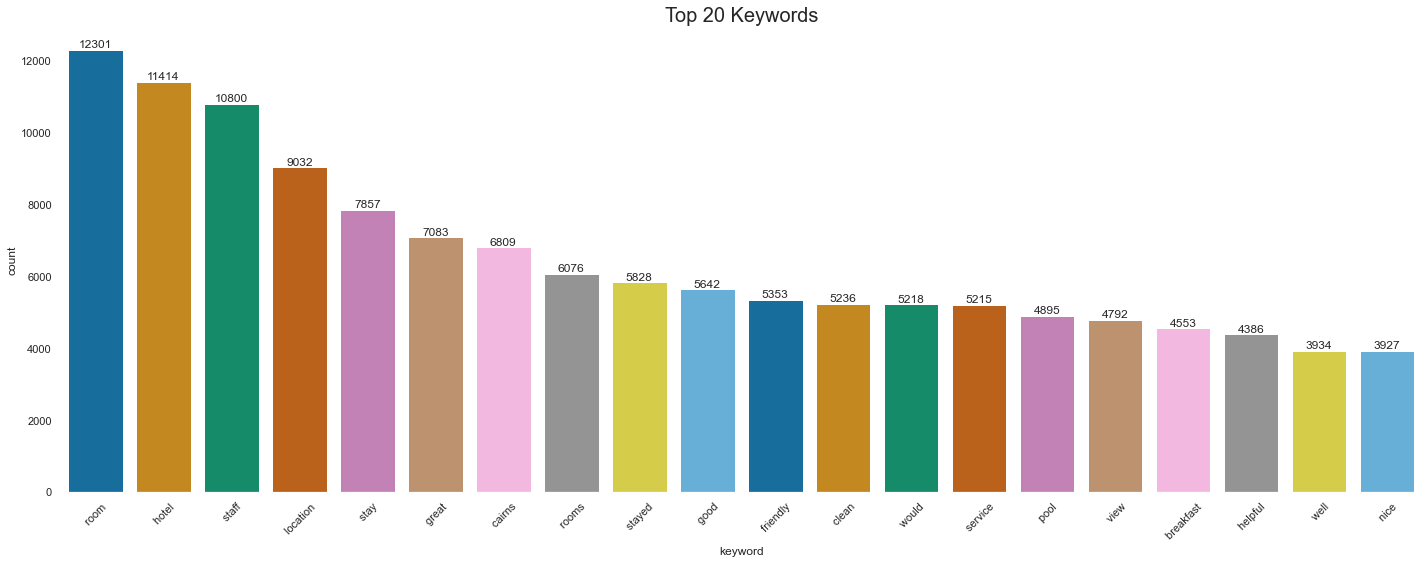

In [35]:
sns.set(rc={'figure.figsize':(20,8)})
fig, ax = plt.subplots()

ax = sns.barplot(data=top_20,x="keyword",y="count",palette="colorblind")
ax.patch.set_visible(False)
ax.tick_params(axis='x', labelrotation = 45)
ax.set_title("Top 20 Keywords",fontsize=20);
for i in ax.containers:
    ax.bar_label(i,)

In [36]:
# to remove punctuations from reviews
reviewsDetails['review'] = reviewsDetails['review'].str.replace('[^\w\s]','', regex=True)
reviewsDetails['reviews'] = reviewsDetails['reviews'].str.replace('[^\w\s]','', regex=True)

Some words are not overly descriptive as they are identifiers to the subject eg room(s), hotel(s), stay, cairns.

Omitting them only provided an alternative top 20 list and no overall cahnge to model performance. 

### Remove stop words from reviews

In [37]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 


#reviewsDetails2=reviewsDetails.copy()
      
def removing_stop_words(txt):
    stop_words = set(stopwords.words('english')) 

    word_tokens = word_tokenize(txt) 

    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
     
    return filtered_sentence
    
reviewsDetails["reviews"] = reviewsDetails["reviews"].apply(removing_stop_words) # ReviewDetails 2 will be used from now on

### Lemmatization

The goal of Stemming and Lemmatization is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form. We skipped Stemming because it is not an efficient method as sometimes it produces words that are not even close to the actual word.

In [38]:
# Making a function to lemmatize (https://www.holisticseo.digital/python-seo/nltk/lemmatize)
lemmatizer = WordNetLemmatizer() 

def lemmatize(data):
    lema_data=[]
    for j in data:
        x=j.lower()
        x=lemmatizer.lemmatize(j,pos='n') # noun
        x=lemmatizer.lemmatize(j,pos='v') # verb
        x=lemmatizer.lemmatize(j,pos='a') # adjective
        x=lemmatizer.lemmatize(j,pos='r') # adverb
        x=lemmatizer.lemmatize(x)
        lema_data.append(x)
    return lema_data


reviewsDetails["reviews"] = reviewsDetails["reviews"].apply(lemmatize)

### Join the comma separated lemmatizied words into a string  

In [39]:
reviewsDetails["reviews"] = reviewsDetails["reviews"].apply(lambda x:" ".join(token for token in x))

### Tokenize the text (convert text into a vector that has a coefficient for each token in the form of binary values)

In [40]:
# use X as this will be the X parameter for ML model
X = reviewsDetails["reviews"].values
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

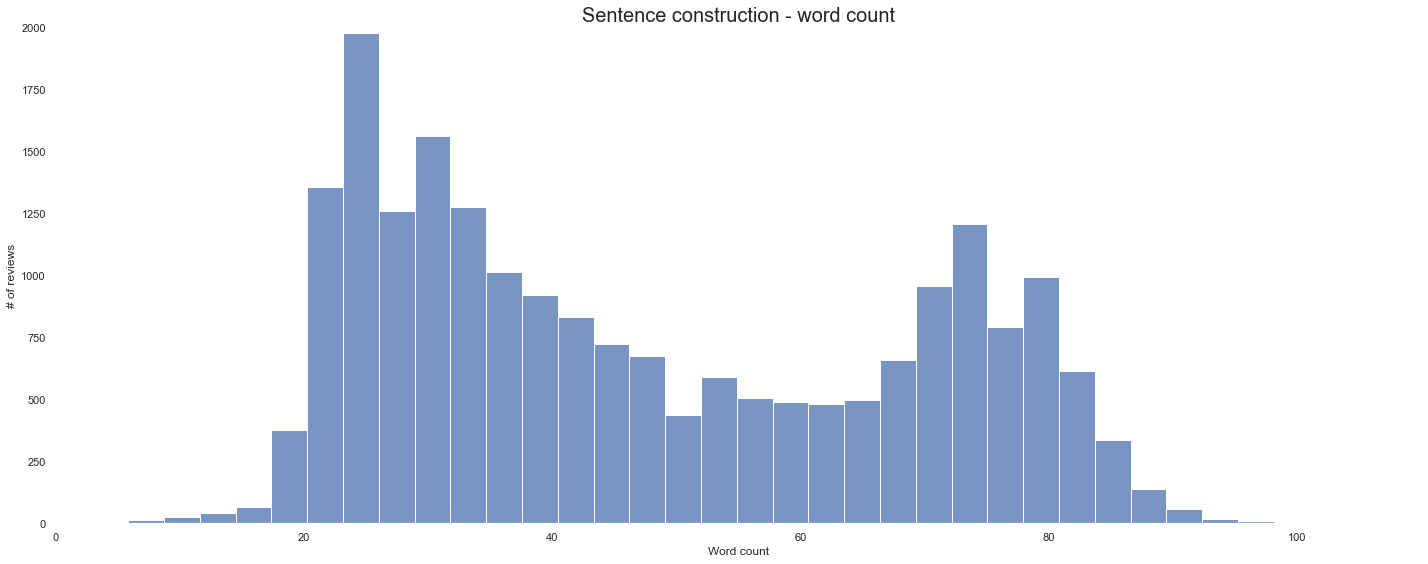

In [41]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(12,9)})
length_dist = [len(x.split(" ")) for x in X]
sns.histplot(length_dist,palette="pastel")
ax.patch.set_visible(False)
ax.set_xlabel("Word count")
ax.set_ylabel("# of reviews")
ax.set_xlim(0,110)
ax.set_ylim(0,2000)
ax.set_title("Sentence construction - word count",fontsize=20);
plt.show()


The word count is rather brief in comparison to other studies.  Those based on USA reviews showed reviews which had in excess of 600 words.

Highlighted in the histogram above is the heavy concentration of reviews with between 25 and 30 words.

In [42]:
X = tokenizer.texts_to_sequences(X)

max_length = max([len(x) for x in X])
vocab_size = len(tokenizer.word_index)+1

print("Vocabulary size: {}".format(vocab_size))
print("Max word count of sentence: {}".format(max_length))

Vocabulary size: 26078
Max word count of sentence: 101


In [43]:
# fill blank elements of array with 0 (pad) to complete indicies matrix

# Padding the reviews [Pads sequences to the same length.]
X = pad_sequences(X, padding='post', maxlen=101)


In [44]:
# used y2 due to spending hours watching cryptic error messages return from ML models output.
# the only way I was assured of converting 1,2,3,4,5 from a string to a float and then convert the list to stay in the parameters of 0-4 for the model
# Sparse Categorical Cross Entropy can handle text categories however for this exercise we will follow the process that y is a float.

y = reviewsDetails['rating']
y2 = np.frompyfunc(lambda x: x.replace(',',''),1,1)(y).astype(float)
y2

y2 = y2.map({1: 0,
            2: 1,
            3: 2,
            4: 3,
            5: 4
           })
y2

0        2
1        4
2        1
3        1
4        3
        ..
20912    4
20913    4
20914    2
20915    4
20916    3
Name: rating, Length: 20917, dtype: int64

## Training

In [58]:
X_train, X_test, y2_train, y2_test = train_test_split( X, y2, test_size=0.2, random_state=2)

### Define Hyperparameters for modelling

In [110]:
# Model configuration
batch_size = 150
embedding_dim = 20
epochs = 2
loss_function = SparseCategoricalCrossentropy()
optimizer = 'Adam'
units = 64
verbosity = 1
val_split = 0.12

In [111]:
# Setup layers and input output tensors, weights (dense),

#https://keras.io/guides/sequential_model/
model = tf.keras.Sequential([
    L.Embedding(vocab_size, int(embedding_dim), input_length=X.shape[1]),
    L.Bidirectional(L.LSTM(int(units),return_sequences=True)),
    L.Conv1D(64,10), # the values here were chosen over numerous test
    L.MaxPool1D(),
    L.Flatten(),
    L.Dropout(0.2),
    L.Dense(128, activation="relu"),
    L.Dropout(0.2),
    L.Dense(64, activation="relu"),
    L.Dropout(0.2),
    L.Dense(5, activation="softmax") # predicted rating should be a value between 0 and 5
])


In [112]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 101, 20)           521560    
                                                                 
 bidirectional_6 (Bidirectio  (None, 101, 128)         43520     
 nal)                                                            
                                                                 
 conv1d_6 (Conv1D)           (None, 92, 64)            81984     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 46, 64)           0         
 1D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 2944)              0         
                                                                 
 dropout_18 (Dropout)        (None, 2944)             

### Compiling Model

In [113]:
# Using Sparse Categorical Crossentropy, Accuracy metric and ADAM optimizer for training.

# https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy (sparse_categorical_crossentropy is advisable when there are 2 or more lables (5 in this case))

model.compile(loss=loss_function, optimizer=optimizer,metrics=['accuracy'])

### Training for 2 EPOCHS

After 10 tests 2 epochs was deemed optimum.  The graphs signalled otherwise yet extending the epochs and the resultant graphs highted between 2 and 3 as optimum.

In [114]:
history = model.fit(X_train, y2_train, epochs=int(epochs), validation_split=float(val_split), batch_size=int(batch_size), verbose=verbosity)

Epoch 1/2
111/111 [==============================] - 84s 727ms/step - loss: 1.0906 - accuracy: 0.5041 - val_loss: 0.8560 - val_accuracy: 0.6078
Epoch 2/2
111/111 [==============================] - 90s 815ms/step - loss: 0.7775 - accuracy: 0.6546 - val_loss: 0.7951 - val_accuracy: 0.6335


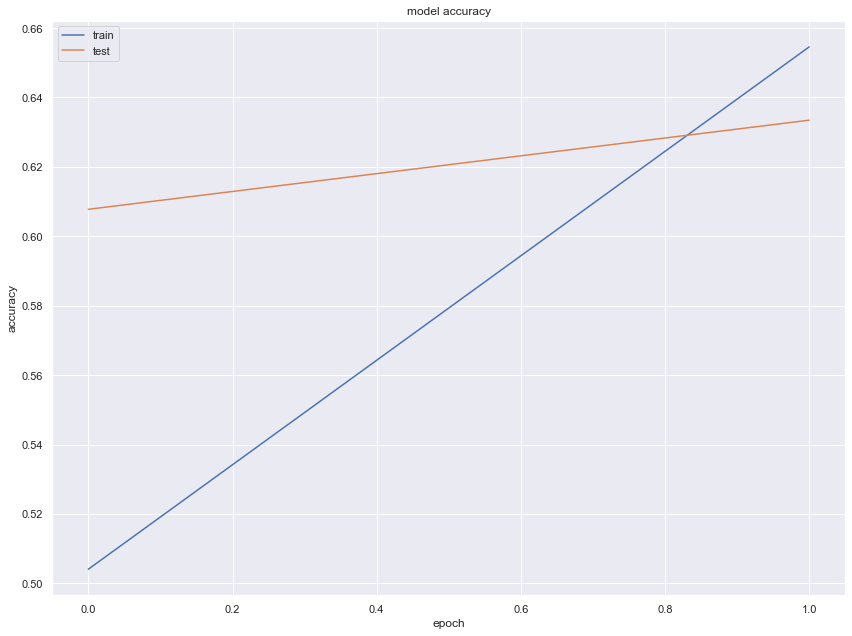

In [115]:
# summarize history for accuracy

#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


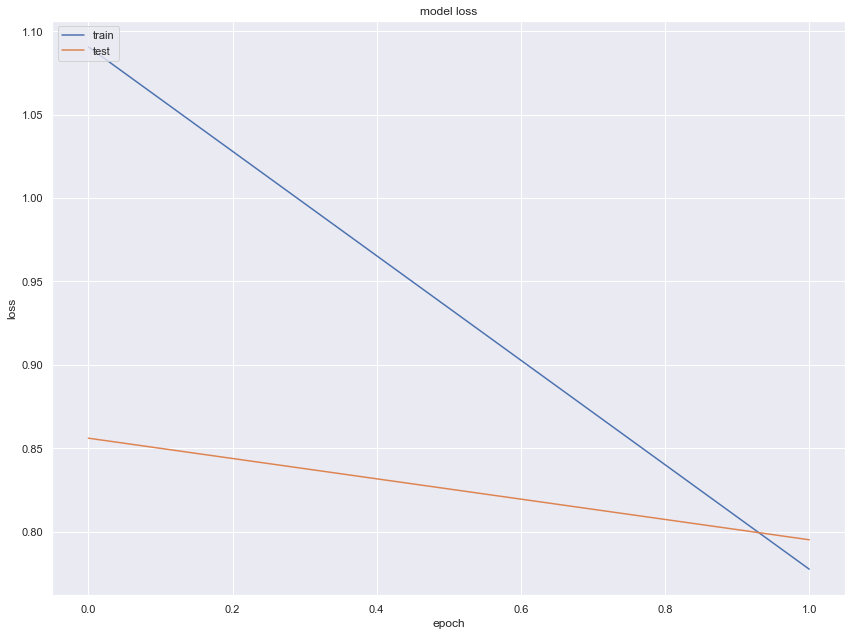

In [116]:
# summarize history for loss

#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Prediction

In [117]:
pred = model.predict(X_test)
pred_final = np.argmax(pred,axis=-1)
pred_final

66/66 [==============================] - 5s 47ms/step


array([3, 4, 4, ..., 4, 2, 2], dtype=int64)

### Accuracy score for model

In [118]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
score = round(accuracy_score(y2_test,pred_final)*100,2)
print('Accuracy: {}%'.format(score))

Accuracy: 64.1%


### Root Mean Square Error for model

In [80]:
# derived from mean_squared_error sklearn
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

RMSE = round(np.sqrt(mean_squared_error(y2_test,pred_final)),3)

print("Root mean square error: {}".format(RMSE))

Root mean square error: 0.72


### Confusion Matrix Heatmap

My model have accuracty predicted rating 1, 4 and 5. Its due to imbalce data as our data have more 4-5 star ratings. This could be solved by using more balnced data or using more samples to train the models.

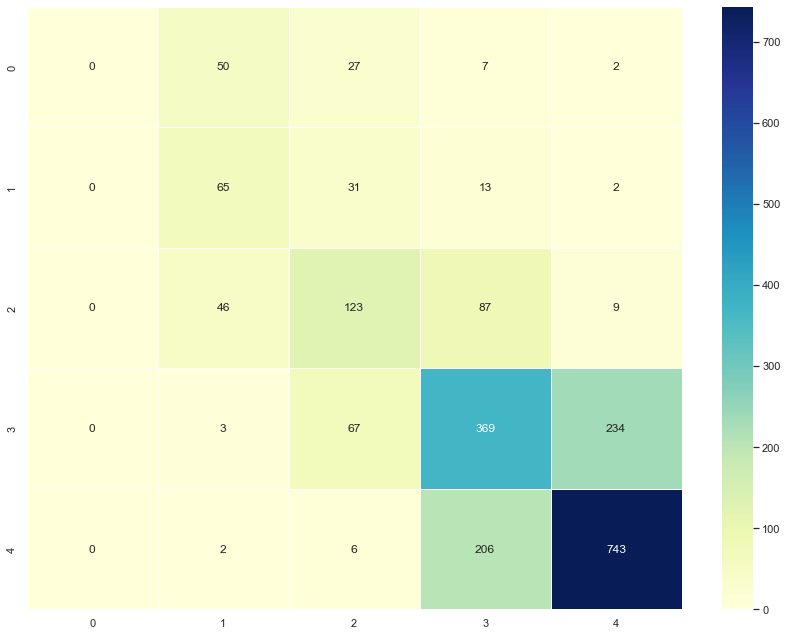

In [81]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix



cm = confusion_matrix(y2_test,pred_final)
sns.heatmap(cm, cmap="YlGnBu", annot=True, fmt='d', linewidths=.5)


plt.show()

### Classification Report

5th Rated class was accurately predicted on all three metrics and 4th class was the second-best predicted class. You can dive into the world of classification reports and find your conclusion.

In [82]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

matrix = classification_report(y2_test,pred_final)

print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        86
           1       0.39      0.59      0.47       111
           2       0.48      0.46      0.47       265
           3       0.54      0.55      0.54       673
           4       0.75      0.78      0.76       957

    accuracy                           0.62      2092
   macro avg       0.43      0.47      0.45      2092
weighted avg       0.60      0.62      0.61      2092



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
